#Sulthan Abdillah Wijaya Rayes 
F1D022161

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


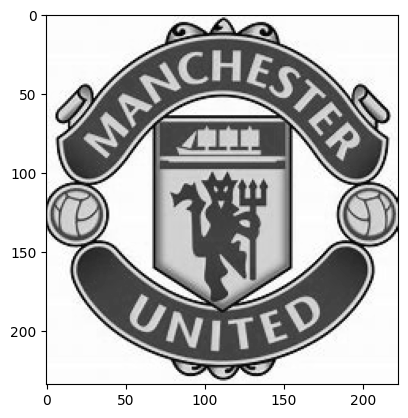

In [22]:
img = cv2.imread('manchester_united.jpeg') #digunakan untuk membaca image dengan library cv2
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #digunakan untuk mengkonversi warna menjadi grayscale
plt.imshow(gray_img, cmap = "gray") #digunakan untuk menampilkan gambar hasil grayscale dengan color map = gray
print(gray_img) #digunakan untuk mencetak nilai matriks

In [17]:
#median filtering
def medFilt(image, h, w): #digunakan untuk membuat fungsi median filtering dengan parameter image, h, dan w.
    tinggi, lebar = image.shape #digunakan menginisialisasikan nilai tinggi dan lebar dengan ukuran citranya.
    result = np.zeros(image.shape, dtype=int) #digunakan untuk menginisialisasikan variabel result dengan nilai array kosong sebanyak nilai citranya dengan tipe data integer
    h2, w2 = int ((h-1)/2), int ((w-1)/2) 
    pad = np.pad (image, ((h2,h-h2-1),(w2,w-w2-1)) , "edge" )
    for i in range (tinggi): #digunakan untuk membuat perulangan tinggi
        for j in range (lebar): #digunakan untuk membuat perulangan lebar
            result[i,j] = np.median(pad[i:i+h, j:j+w])
    return result #untuk mengembalikan nilai result

In [18]:
#mean filtering
def mean (matriks): #digunakan untuk membuat fungsi mean dengan parameter matriks
    m = np.sum(matriks) #digunakan untuk menginisialisasikan variabel m dengan hasil dari penjumlahan array yang ada pada matriks citra
    panjang, lebar = matriks.shape #digunakan untuk menginisialisasikan panjang dan lebar citra dengan nilai dari ukuran pixel citra
    return (m/ (panjang*lebar)) #mengembalikan nilai m/(panjang*lebar)
def meanFilt(image, h, w): #digunakan untuk membuat fungsi mean filtering dengan parameter image, h, dan w.
    tinggi , lebar = image.shape #digunakan menginisialisasikan nilai tinggi dan lebar dengan ukuran citranya.
    result = np.zeros(image.shape, dtype = int) #digunakan untuk menginisialisasikan variabel result dengan nilai array kosong sebanyak nilai citranya dengan tipe data integer
    h2, w2 = int ((h-1)/2), int ((w-1)/2)
    pad = np.pad (image, ((h2,h-h2-1),(w2,w-w2-1)) , "edge" )
    for i in range (tinggi): #digunakan untuk membuat perulangan tinggi
        for j in range (lebar): #digunakan untuk membuat perulangan lebar
            result[i,j] = np.mean(pad[i:i+h, j:j+w])
    return result #untuk mengembalikan nilai result

In [19]:
def modus(array): #digunakan untuk membuat fungsi modus dengan parameter array
    arr = np.sort (array, axis=None) #untuk menginisialisasikan variabel arr dengan nilai dari hasil pengurutan array dari yang terkecil ke yang terbesar
    indeks = np.zeros ( np.max(arr)+1, dtype= int ) #untuk membuat 1 array kosong dari variabel arr yang berisi nilai maksimum atau nilai terbanyak yang ada pada arr dengan tipe data integer
    for i in range (len(arr)): #membuat perulangan sepanjangan ukuran dari variabel arr
        indeks[arr[i]] += 1 #menjumlahkan nilai indeks dengan 1 selama perulangan berlangsung
        
    m = np.max(indeks) #mencari nilai maksimum yang ada pada indeks dengan inisialisasi variabel m
    for j in range (len(indeks)): #membuat perulangan sepanjang ukuran dari indeks
        if (indeks[j] == m): #membuat kondisi jika indeks[j] == m
            return j #maka, akan mengembalikan nilai j

def modusFilt(image, h, w): #digunakan untuk membuat fungsi modus filtering dengan parameter image, h, dan w.
    tinggi , lebar = image.shape #digunakan menginisialisasikan nilai tinggi dan lebar dengan ukuran citranya.
    result = np.zeros(image.shape, dtype=int) #digunakan untuk menginisialisasikan variabel result dengan nilai array kosong sebanyak nilai citranya dengan tipe data integer
    h2, w2 = int ((h-1)/2), int ((w-1)/2) 
    pad = np.pad (image, ((h2,h-h2-1),(w2,w-w2-1)) , "edge" )
    for i in range (tinggi): #digunakan untuk membuat perulangan tinggi
        for j in range (lebar): #digunakan untuk membuat perulangan lebar
            result[i,j] = modus (pad[i:i+h, j:j+w])
    return result #untuk mengembalikan nilai result

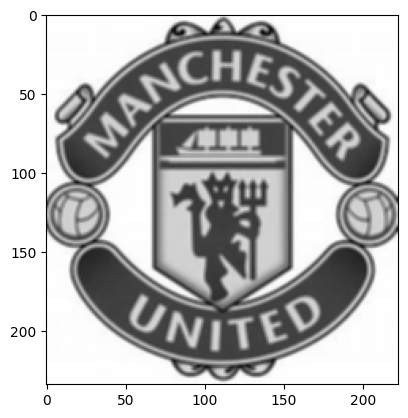

In [23]:
plt.imshow(meanFilt(gray_img, 3,3), cmap = 'gray') #menampilkan citra dengan memanggil fungsi meanFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 3*3

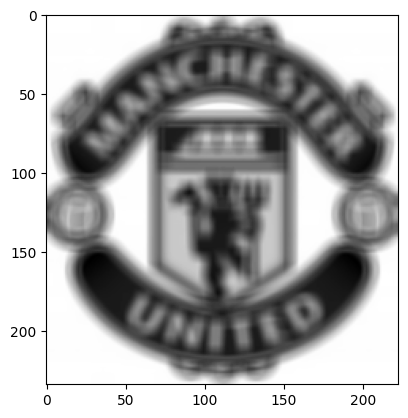

In [24]:
#mean 9*9
plt.imshow(meanFilt(gray_img, 9,9), cmap = 'gray') #menampilkan citra dengan memanggil fungsi meanFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 9*9

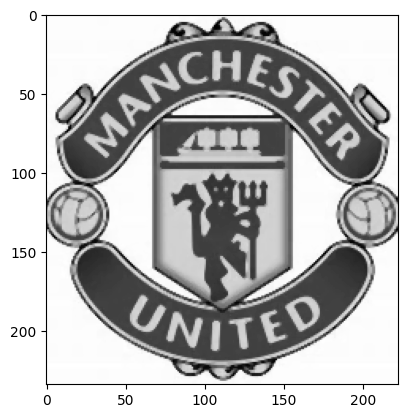

In [25]:
#median 3*3:
plt.imshow(medFilt(gray_img, 3, 3), cmap = 'gray') #menampilkan citra dengan memanggil fungsi medFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 3*3

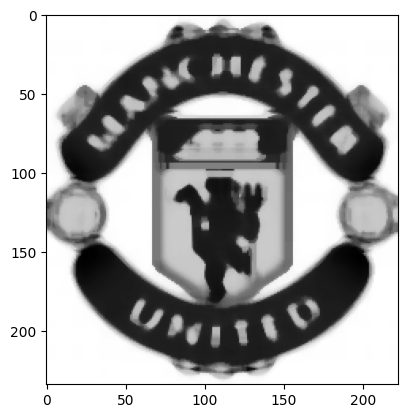

In [26]:
#median 9*9:
plt.imshow(medFilt(gray_img, 9, 9), cmap = 'gray') #menampilkan citra dengan memanggil fungsi medFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 9*9

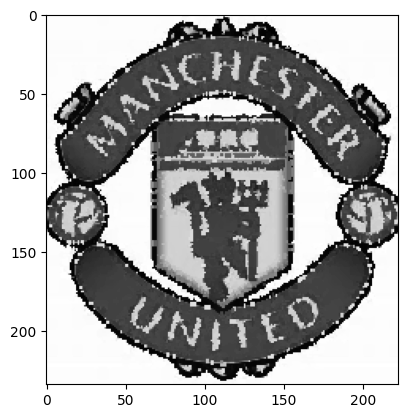

In [27]:
#modus 3*3
plt.imshow(modusFilt(gray_img, 3, 3), cmap = 'gray') #menampilkan citra dengan memanggil fungsi modusFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 3*3

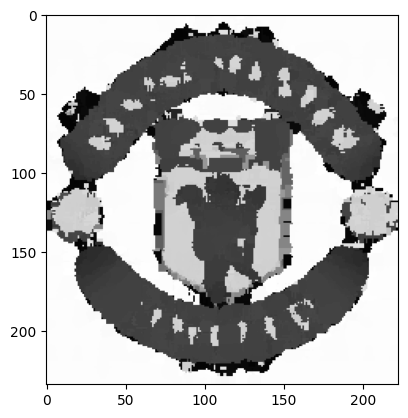

In [28]:
#modus 9*9
plt.imshow(modusFilt(gray_img, 9, 9), cmap = 'gray') #menampilkan citra dengan memanggil fungsi modusFilt dengan mengisi parameternya dengan gray_img, h dan w nya, yaitu 9*9

In [31]:
def smoothingFilter1(image):
    kernel = np.array([[1/10, 1/10, 1/10],
                       [1/10, 1/5, 1/10],
                       [1/10, 1/10, 1/10]])
    smoothed_img = cv.filter2D(image, -1, kernel)
    return smoothed_img


In [32]:
def sharpeningFilter1(image):
    kernel = np.array([[1/9, 1/9, 1/9],
                       [1/9, 8/9, 1/9],
                       [1/9, 1/9, 1/9]])
    sharpened_img = cv.filter2D(image, -1, kernel)
    return sharpened_img


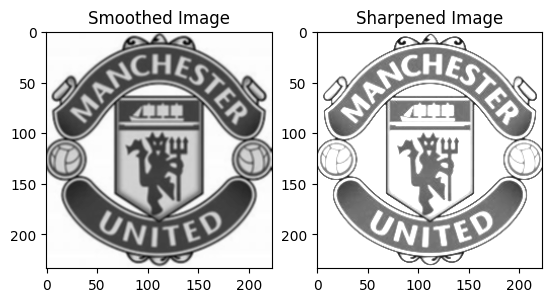

In [33]:
smoothed_img = smoothingFilter1(gray_img)
sharpened_img = sharpeningFilter1(gray_img)

plt.subplot(1, 2, 1)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')

plt.show()


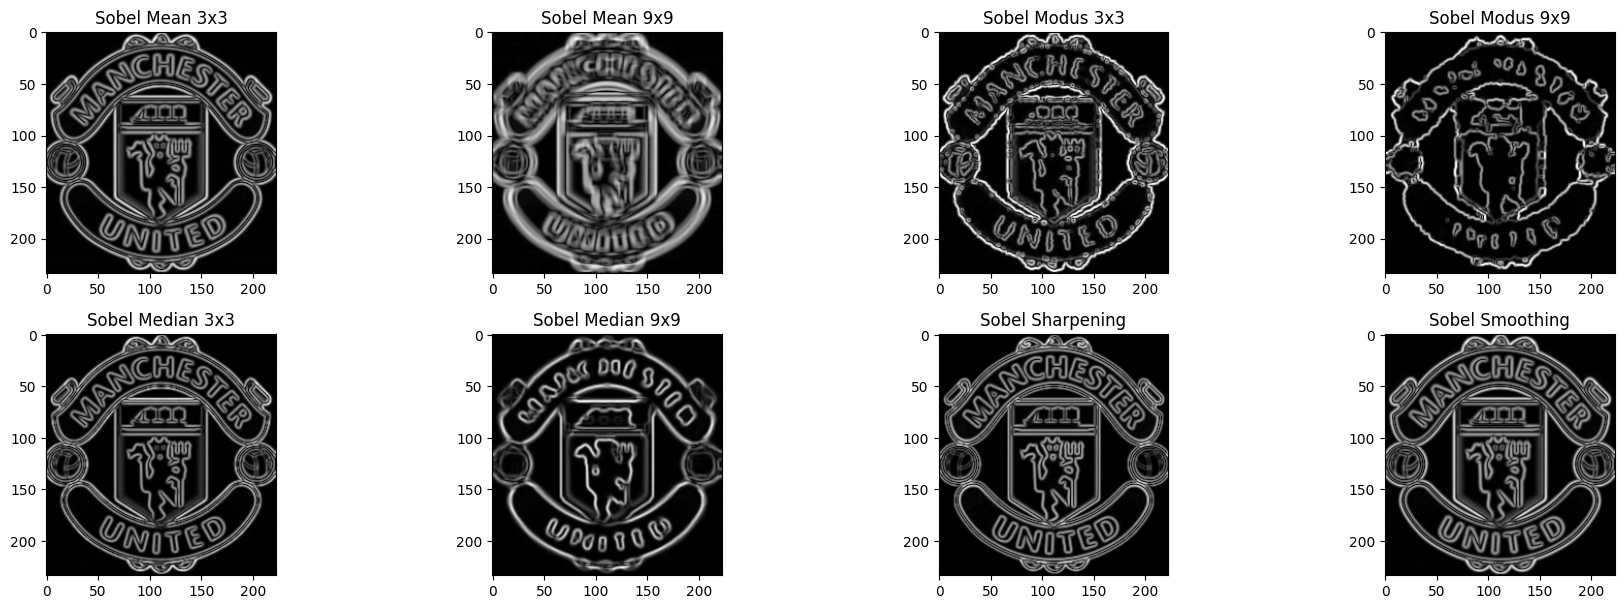

In [43]:
# Define a function for edge detection using Sobel operator
def edgeDetectionSobel(image):
    # Convert image to float32
    image = np.float32(image)
    
    # Apply Gaussian blur for noise reduction (optional but recommended)
    blurred_img = cv.GaussianBlur(image, (3, 3), 0)
    
    # Compute gradients using Sobel operator
    grad_x = cv.Sobel(blurred_img, cv.CV_64F, 1, 0, ksize=3)
    grad_y = cv.Sobel(blurred_img, cv.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    
    return grad_mag

# Apply edge detection using Sobel operator on different processed images
sobel_mean_3x3 = edgeDetectionSobel(meanFilt(gray_img, 3, 3))
sobel_mean_9x9 = edgeDetectionSobel(meanFilt(gray_img, 9, 9))
sobel_modus_3x3 = edgeDetectionSobel(modusFilt(gray_img, 3, 3))
sobel_modus_9x9 = edgeDetectionSobel(modusFilt(gray_img, 9, 9))
sobel_median_3x3 = edgeDetectionSobel(medFilt(gray_img, 3, 3))
sobel_median_9x9 = edgeDetectionSobel(medFilt(gray_img, 9, 9))
sobel_sharpening = edgeDetectionSobel(sharpened_img)
sobel_smoothing = edgeDetectionSobel(smoothed_img)

# Plotting the results
plt.figure(figsize=(18, 12))

plt.subplot(4, 4, 1)
plt.imshow(sobel_mean_3x3, cmap='gray')
plt.title('Sobel Mean 3x3')

plt.subplot(4, 4, 2)
plt.imshow(sobel_mean_9x9, cmap='gray')
plt.title('Sobel Mean 9x9')

plt.subplot(4, 4, 3)
plt.imshow(sobel_modus_3x3, cmap='gray')
plt.title('Sobel Modus 3x3')

plt.subplot(4, 4, 4)
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.title('Sobel Modus 9x9')

plt.subplot(4, 4, 5)
plt.imshow(sobel_median_3x3, cmap='gray')
plt.title('Sobel Median 3x3')

plt.subplot(4, 4, 6)
plt.imshow(sobel_median_9x9, cmap='gray')
plt.title('Sobel Median 9x9')

plt.subplot(4, 4, 7)
plt.imshow(sobel_sharpening, cmap='gray')
plt.title('Sobel Sharpening')

plt.subplot(4, 4, 8)
plt.imshow(sobel_smoothing, cmap='gray')
plt.title('Sobel Smoothing')

plt.tight_layout()
plt.show()


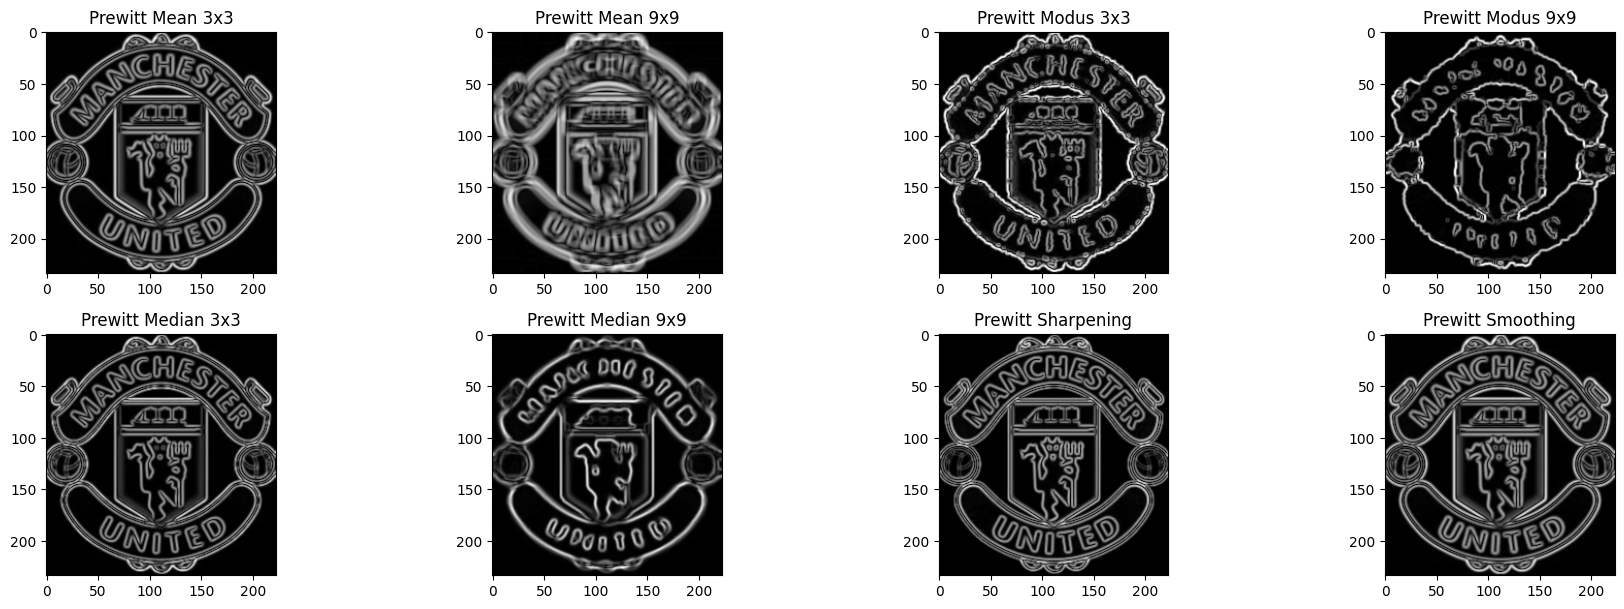

In [42]:
# Define a function for edge detection using Prewitt operator
def edgeDetectionPrewitt(image):
    # Convert image to float32
    image = np.float32(image)
    
    # Apply Gaussian blur for noise reduction (optional but recommended)
    blurred_img = cv.GaussianBlur(image, (3, 3), 0)
    
    # Compute gradients using Prewitt operator
    grad_x = cv.Sobel(blurred_img, cv.CV_64F, 1, 0, ksize=3)
    grad_y = cv.Sobel(blurred_img, cv.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    
    return grad_mag

# Apply edge detection using Prewitt operator on different processed images
prewitt_mean_3x3 = edgeDetectionPrewitt(meanFilt(gray_img, 3, 3))
prewitt_mean_9x9 = edgeDetectionPrewitt(meanFilt(gray_img, 9, 9))
prewitt_modus_3x3 = edgeDetectionPrewitt(modusFilt(gray_img, 3, 3))
prewitt_modus_9x9 = edgeDetectionPrewitt(modusFilt(gray_img, 9, 9))
prewitt_median_3x3 = edgeDetectionPrewitt(medFilt(gray_img, 3, 3))
prewitt_median_9x9 = edgeDetectionPrewitt(medFilt(gray_img, 9, 9))
prewitt_sharpening = edgeDetectionPrewitt(sharpened_img)
prewitt_smoothing = edgeDetectionPrewitt(smoothed_img)

# Plotting the results
plt.figure(figsize=(18, 12))

plt.subplot(4, 4, 1)
plt.imshow(prewitt_mean_3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')

plt.subplot(4, 4, 2)
plt.imshow(prewitt_mean_9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')

plt.subplot(4, 4, 3)
plt.imshow(prewitt_modus_3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')

plt.subplot(4, 4, 4)
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.title('Prewitt Modus 9x9')

plt.subplot(4, 4, 5)
plt.imshow(prewitt_median_3x3, cmap='gray')
plt.title('Prewitt Median 3x3')

plt.subplot(4, 4, 6)
plt.imshow(prewitt_median_9x9, cmap='gray')
plt.title('Prewitt Median 9x9')

plt.subplot(4, 4, 7)
plt.imshow(prewitt_sharpening, cmap='gray')
plt.title('Prewitt Sharpening')

plt.subplot(4, 4, 8)
plt.imshow(prewitt_smoothing, cmap='gray')
plt.title('Prewitt Smoothing')

plt.tight_layout()
plt.show()


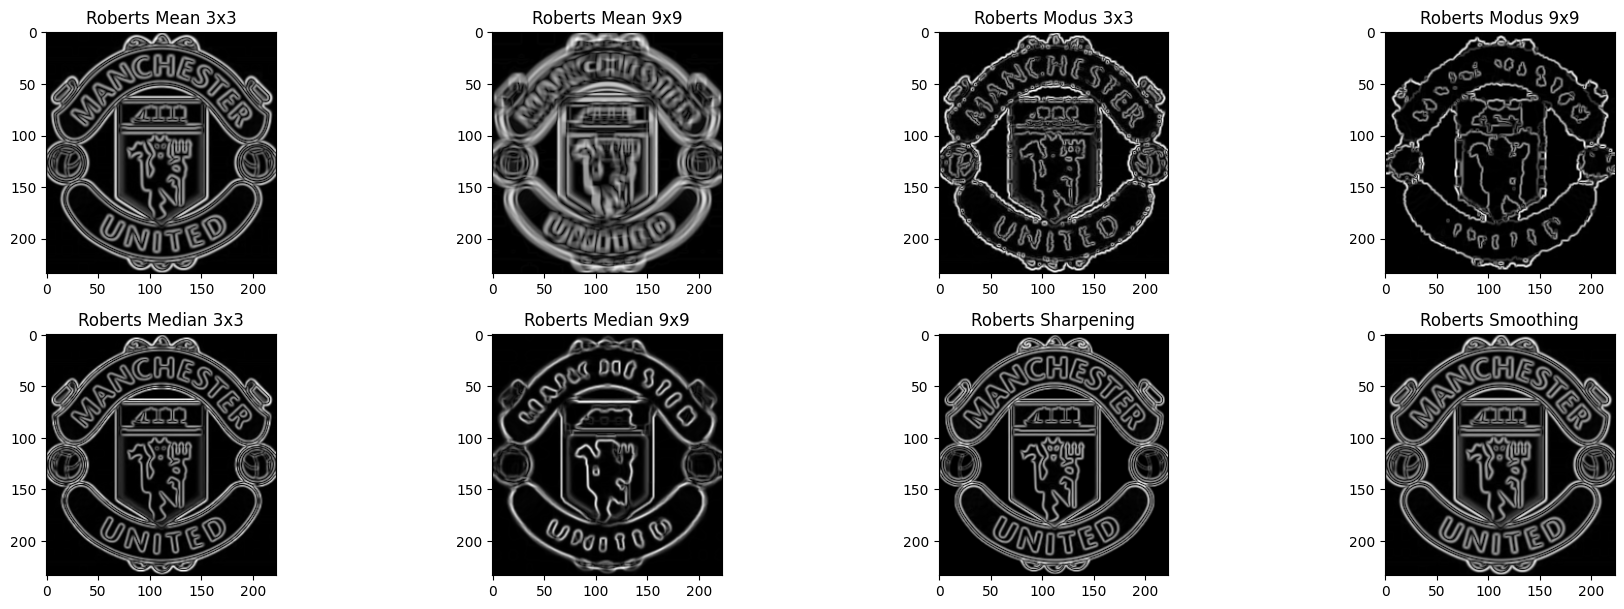

In [41]:
# Define a function for edge detection using Roberts operator
def edgeDetectionRoberts(image):
    # Convert image to float32
    image = np.float32(image)
    
    # Apply Gaussian blur for noise reduction (optional but recommended)
    blurred_img = cv.GaussianBlur(image, (3, 3), 0)
    
    # Define Roberts kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, -1], [1, 0]])
    
    # Compute gradients using Roberts operator
    grad_x = cv.filter2D(blurred_img, -1, kernel_x)
    grad_y = cv.filter2D(blurred_img, -1, kernel_y)
    
    # Compute gradient magnitude
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    
    return grad_mag

# Apply edge detection using Roberts operator on different processed images
roberts_mean_3x3 = edgeDetectionRoberts(meanFilt(gray_img, 3, 3))
roberts_mean_9x9 = edgeDetectionRoberts(meanFilt(gray_img, 9, 9))
roberts_modus_3x3 = edgeDetectionRoberts(modusFilt(gray_img, 3, 3))
roberts_modus_9x9 = edgeDetectionRoberts(modusFilt(gray_img, 9, 9))
roberts_median_3x3 = edgeDetectionRoberts(medFilt(gray_img, 3, 3))
roberts_median_9x9 = edgeDetectionRoberts(medFilt(gray_img, 9, 9))
roberts_sharpening = edgeDetectionRoberts(sharpened_img)
roberts_smoothing = edgeDetectionRoberts(smoothed_img)

# Plotting the results
plt.figure(figsize=(18, 12))

plt.subplot(4, 4, 1)
plt.imshow(roberts_mean_3x3, cmap='gray')
plt.title('Roberts Mean 3x3')

plt.subplot(4, 4, 2)
plt.imshow(roberts_mean_9x9, cmap='gray')
plt.title('Roberts Mean 9x9')

plt.subplot(4, 4, 3)
plt.imshow(roberts_modus_3x3, cmap='gray')
plt.title('Roberts Modus 3x3')

plt.subplot(4, 4, 4)
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.title('Roberts Modus 9x9')

plt.subplot(4, 4, 5)
plt.imshow(roberts_median_3x3, cmap='gray')
plt.title('Roberts Median 3x3')

plt.subplot(4, 4, 6)
plt.imshow(roberts_median_9x9, cmap='gray')
plt.title('Roberts Median 9x9')

plt.subplot(4, 4, 7)
plt.imshow(roberts_sharpening, cmap='gray')
plt.title('Roberts Sharpening')

plt.subplot(4, 4, 8)
plt.imshow(roberts_smoothing, cmap='gray')
plt.title('Roberts Smoothing')

plt.tight_layout()
plt.show()
